In [3]:
import os,gc,sys
import warnings
warnings.filterwarnings('ignore')
from copy import deepcopy
from glob import glob

import pickle
# import feather
%matplotlib inline

import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from matplotlib.colors import ListedColormap

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from itertools import cycle

plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams['font.family'] = 'Ricty Diminised'
sns.set(style="whitegrid", font='Ricty Diminised', palette="muted",
        color_codes=True, rc={'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]

In [4]:
#表示するrow,columns調整
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [25]:
#分析・集計に使うモジュールとライブラリ
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

#各種機械学習モデル
#LogisticRegression
from sklearn.linear_model import LogisticRegression
#Linear Support Vector Machine
from sklearn.svm import LinearSVC
#Support Vector Machine
from sklearn.svm import SVC
#決定木
from sklearn.tree import DecisionTreeClassifier
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
#k近傍方（k-neighbor）
from sklearn.neighbors import KNeighborsClassifier
#Logistic-regression
from sklearn.linear_model import LogisticRegression

#学習方法（GridSearchCV）
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#scikiti-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,GroupKFold
from sklearn.metrics import roc_auc_score

#スコアリング（f値）
from sklearn.metrics import f1_score

#lightgbm
import lightgbm as lgb

#XGBoost
import xgboost as xgb

# import pandas_profiling as pdp


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [31]:
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_label = pd.Series(data=iris.target)

In [30]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
print(data.shape)
print(target.shape)

(150, 4)
(150,)


### 通常のtrain, testでの学習

In [118]:
# 目的変数を確認した結果、データが偏っているのでランダムにシャッフルした上で、トレーニング用データと検証用データに分割する
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label)

In [119]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### ホールドアウト検証を行った場合

In [120]:
from sklearn.metrics import confusion_matrix
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [121]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [122]:
y_pred

array([0, 0, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0,
       0, 1, 0, 2, 1, 1])

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, y_pred)

0.9285714285714286

Text(39.5, 0.5, 'prediction')

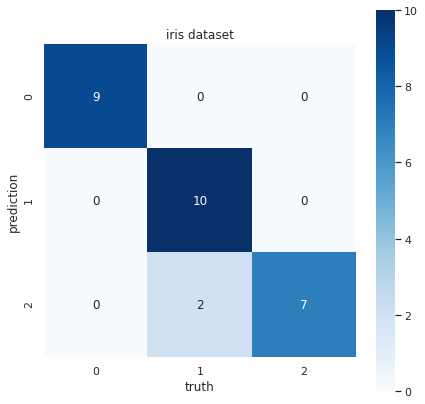

In [124]:
conf_mat = confusion_matrix(y_valid, y_pred)

index = list("012")
columns = list("012")
df = pd.DataFrame(conf_mat, index=index, columns=columns)

fig = plt.figure(figsize=(7, 7))
sns.heatmap(df, annot=True, square=True, fmt='.0f', cmap="Blues")
plt.title('iris dataset')
plt.xlabel('truth')
plt.ylabel('prediction')

### 交差検証を行った場合

In [98]:
kf = KFold(n_splits=3, shuffle=True, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.25, random_state=0)

In [99]:
scores = cross_val_score(clf, X_train, y_train, cv=kf)
scores

array([0.97368421, 0.94594595, 0.97297297])

In [125]:
scores.mean()

0.9642010431484116

### StratifiedKFold
データセット全体の偏りを維持しながらデータセットを分割できる

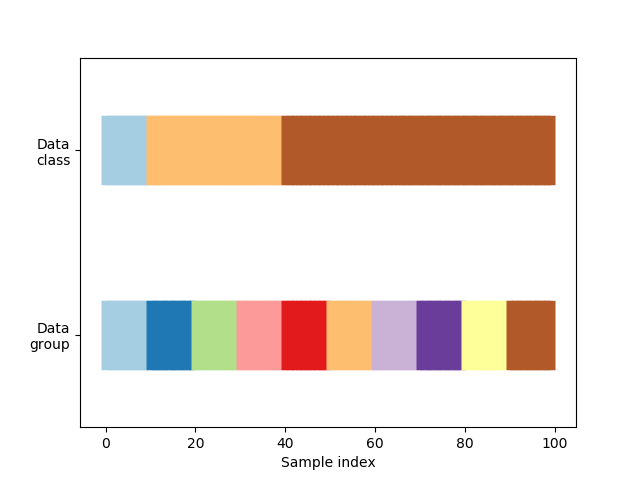

↑GroupとClassの考え方があって、クラスは一般的に言われるカテゴリーでグループは同じ種類のデータのまとまり（ユーザーとか）

In [127]:
X = np.ones(10)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [129]:
skf = StratifiedKFold(n_splits=3)
skf

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [131]:
skf.split(X, y)

<generator object _BaseKFold.split at 0x7f4d652cd6d0>

In [130]:
for train, test in skf.split(X, y):
    print("%s %s" % (train, test)) #train,testはサンプルのインデックス

[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]
